In [59]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [3]:
# Number of Row and Columns

print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 4238
Number of columns: 16


In [4]:
# Copying 
data = df.copy()

In [5]:
# Desciption
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
# NULL counts
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
# Checking the Duplicate Values
df.duplicated().sum()

0

In [9]:
# Dealing with NULL values
df[df.isnull().any(axis=1)] # printing the null records

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [10]:
cols_null = list(df.columns[df.isnull().any()])
cols_null

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

In [11]:
# Replacing the values with Mean Value
for col in cols_null:
    mean_value = df[col].mean()
    df[col].replace(np.nan, mean_value, inplace= True)
    print(f'Replacing {mean_value} in {col}')

Replacing 1.9789499153157513 in education
Replacing 9.003088619624615 in cigsPerDay
Replacing 0.02962962962962963 in BPMeds
Replacing 236.72158548233045 in totChol
Replacing 25.80200758473572 in BMI
Replacing 75.87892376681614 in heartRate
Replacing 81.96675324675324 in glucose


In [12]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [14]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

df_glucose = df.groupby('glucose')['age'].unique()
df_glucose

glucose
40.0             [57, 43]
43.0                 [38]
44.0             [42, 59]
45.0     [63, 59, 42, 43]
47.0             [42, 62]
               ...       
348.0                [46]
368.0                [62]
370.0                [64]
386.0                [62]
394.0            [62, 67]
Name: age, Length: 144, dtype: object

In [15]:
df_heartRate = df.groupby('heartRate')['age'].unique()
df_heartRate

heartRate
44.0                 [59]
45.0             [35, 36]
46.0                 [40]
47.0                 [46]
48.0     [61, 47, 49, 51]
               ...       
122.0            [48, 67]
125.0        [36, 44, 40]
130.0                [40]
140.0                [64]
143.0                [57]
Name: age, Length: 74, dtype: object

In [16]:
df_sysBP = df.groupby('sysBP')['age'].unique()
df_sysBP

sysBP
83.5     [58, 35]
85.0         [39]
85.5         [58]
90.0     [46, 38]
92.0         [53]
           ...   
235.0        [65]
243.0        [48]
244.0        [59]
248.0        [62]
295.0        [64]
Name: age, Length: 234, dtype: object

In [17]:
df_diaBP = df.groupby('sysBP')['diaBP'].unique()
df_diaBP

sysBP
83.5     [58.0, 55.0]
85.0           [70.0]
85.5           [51.0]
90.0     [60.0, 70.0]
92.0           [69.0]
             ...     
235.0         [100.0]
243.0         [142.5]
244.0         [124.0]
248.0         [130.0]
295.0         [135.0]
Name: diaBP, Length: 234, dtype: object

In [18]:
def plot_graph(x, y):
    plt.bar(df[x], df[y])
    X = x.upper()
    Y = y.upper()
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.title(f'{X} VS {Y}')
    plt.tight_layout()
    plt.show()

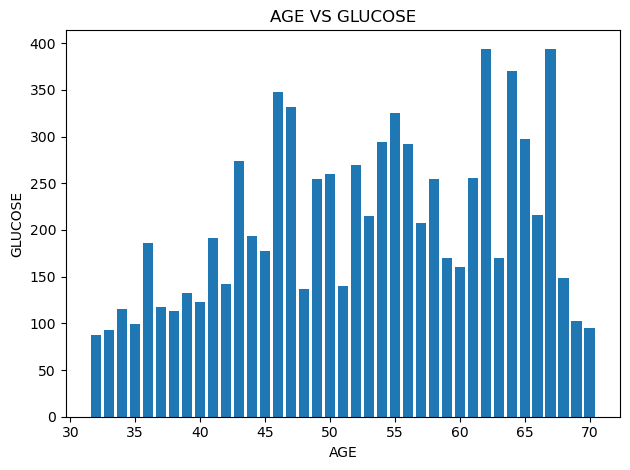

In [19]:
plot_graph('age', 'glucose')

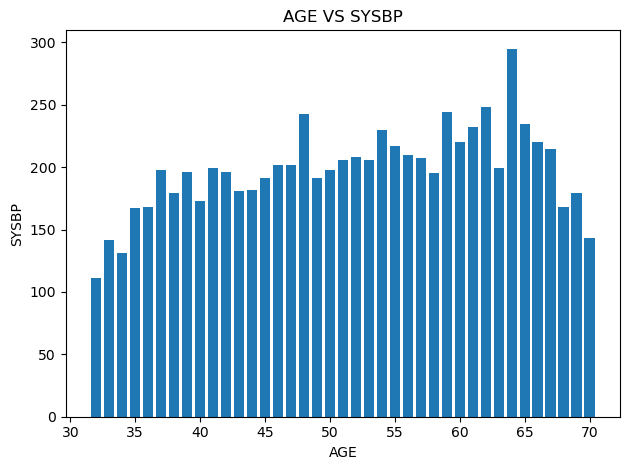

In [20]:
plot_graph('age', 'sysBP')

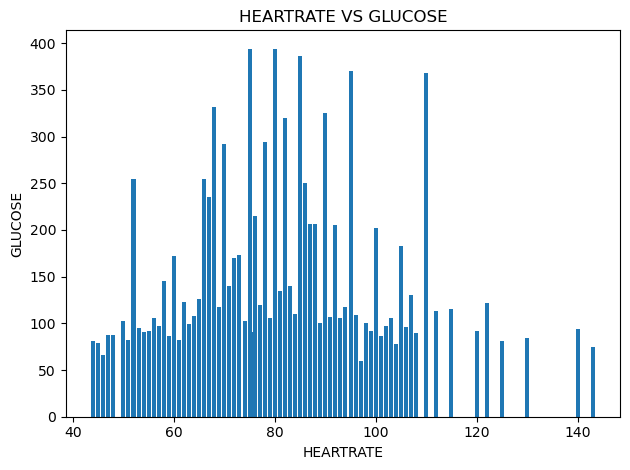

In [21]:
plot_graph('heartRate', 'glucose')

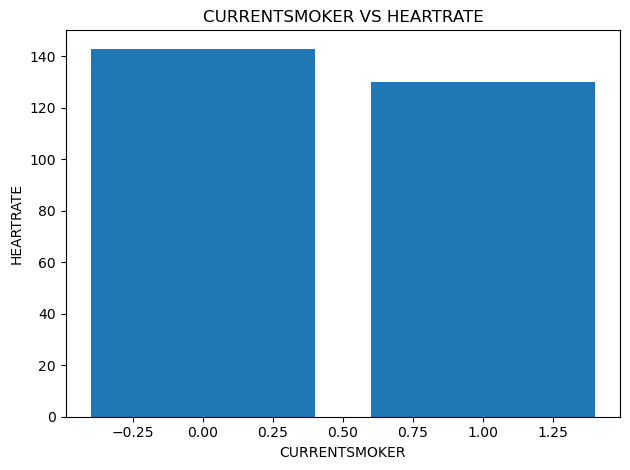

In [22]:
plot_graph('currentSmoker', 'heartRate')

In [28]:
# Checking for Outlier
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


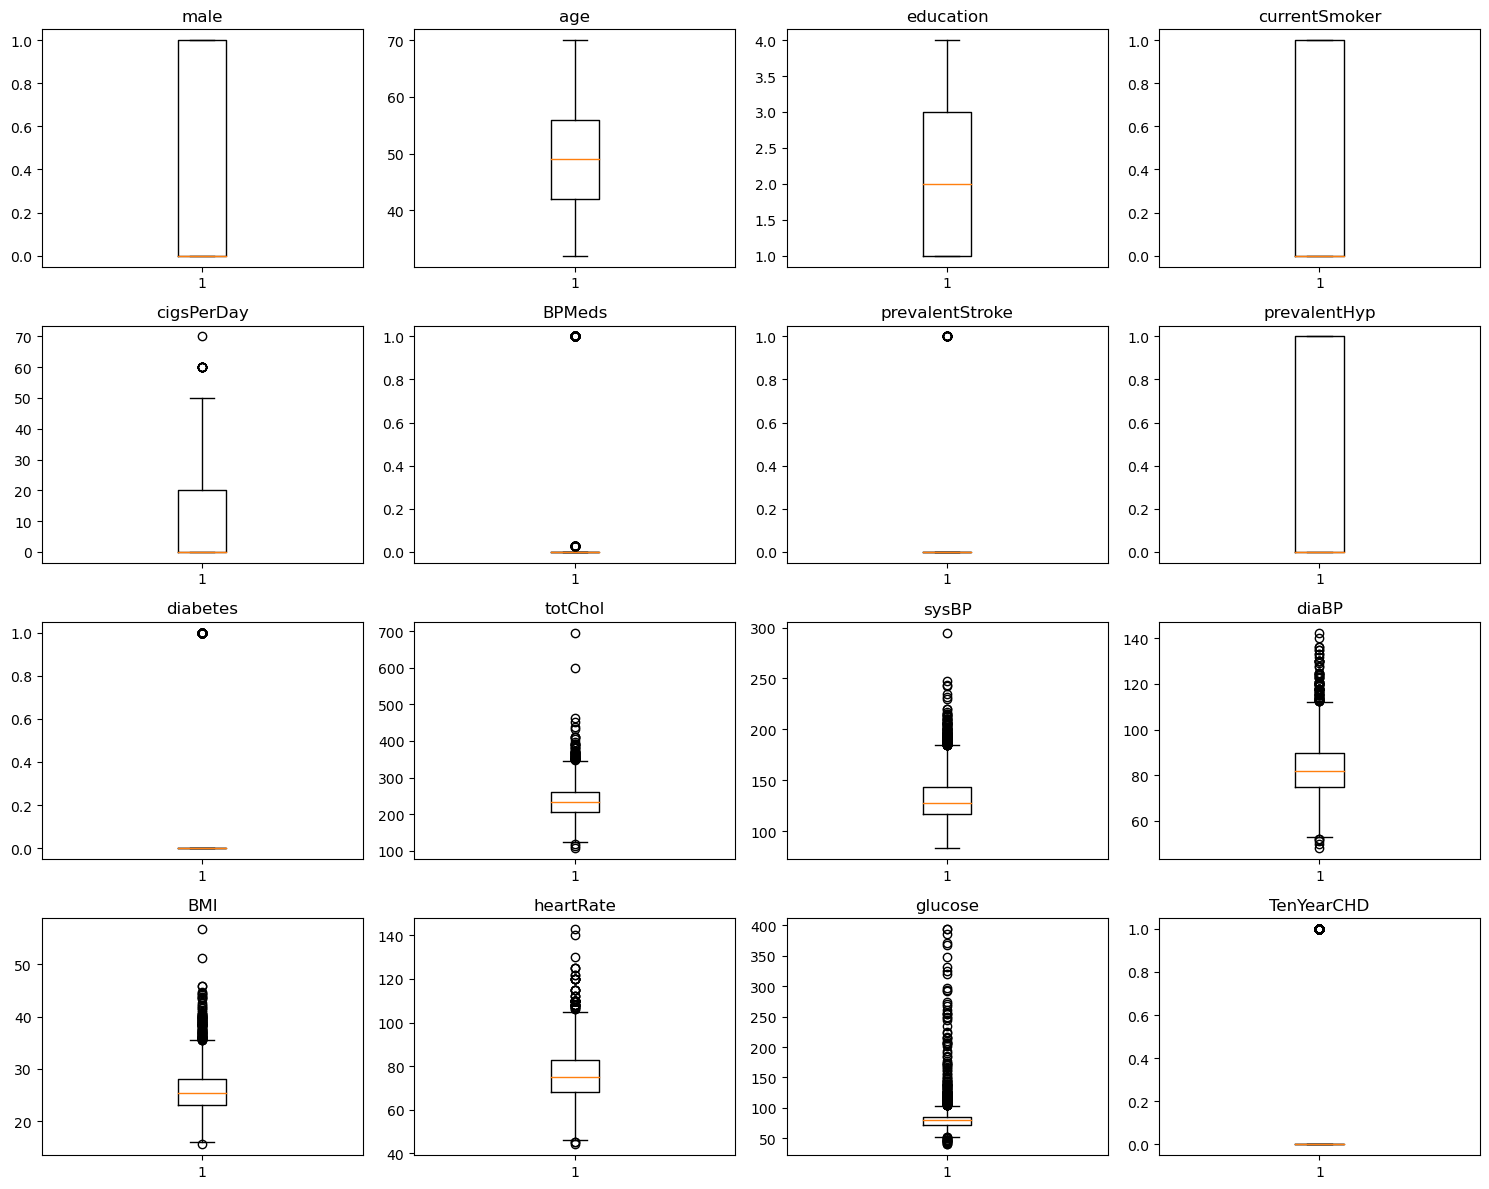

In [31]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [33]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df [field_name], 75)) ].index, inplace=True) 
    df.drop(df[df[field_name] < (np.percentile(df [field_name], 25) - iqr)].index, inplace=True)

In [35]:
outliers_cols = ['glucose', 'diaBP', 'sysBP', 'totChol', 'cigsPerDay']
for col in outliers_cols:
    drop_outliers(df, col)

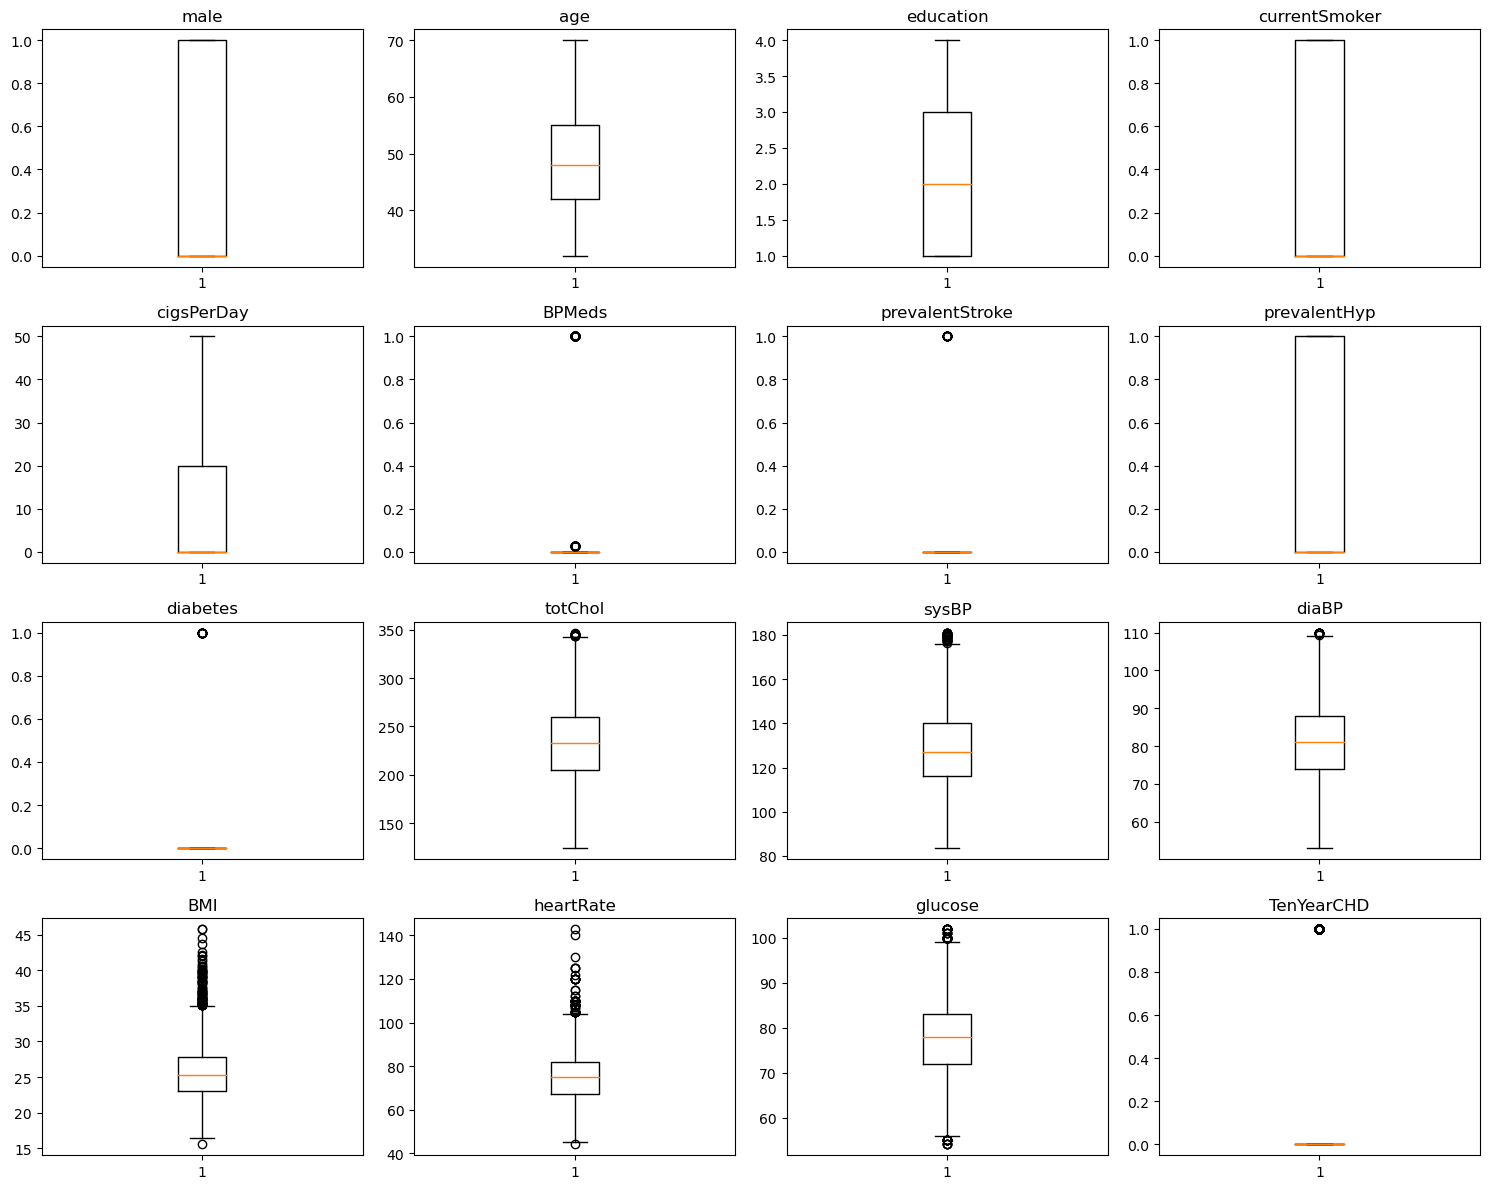

In [36]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

<Axes: >

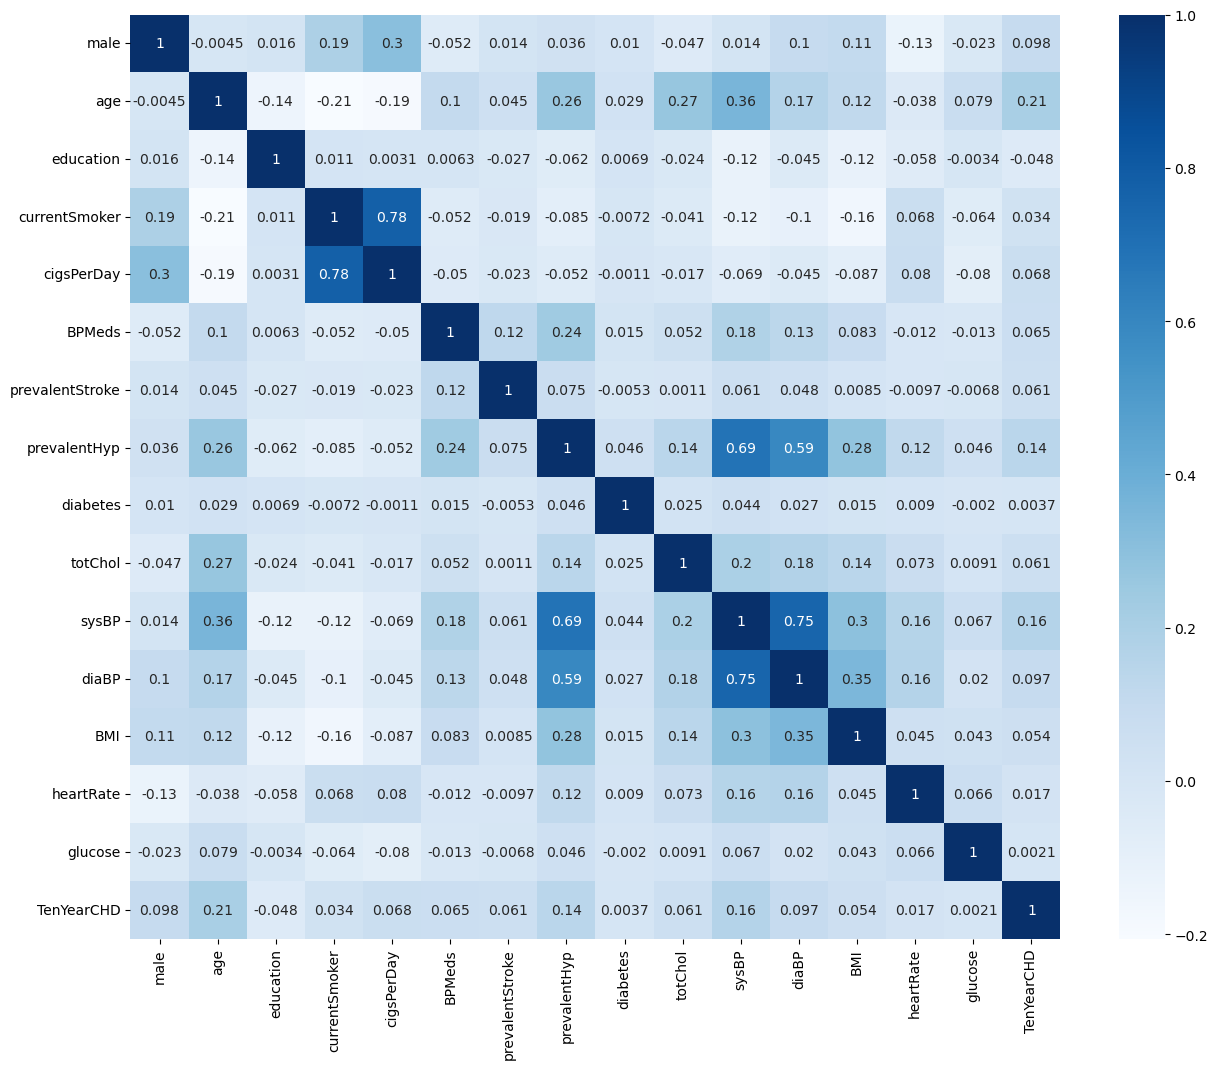

In [37]:
# Correlation
cor = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(cor, annot= True, cmap='Blues')

In [38]:
# FINDING THE CORRELATION
cor['TenYearCHD'].sort_values(ascending=True)

education         -0.047915
glucose            0.002068
diabetes           0.003697
heartRate          0.017181
currentSmoker      0.033623
BMI                0.054321
prevalentStroke    0.060896
totChol            0.061049
BPMeds             0.064730
cigsPerDay         0.067793
diaBP              0.097092
male               0.098041
prevalentHyp       0.138556
sysBP              0.162345
age                0.206585
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64

In [39]:
# Calculate the Pearson correlation coefficients
target_variable = 'TenYearCHD'
correlation_threshold = 0.05  # Set your desired correlation threshold

# Select features based on correlation
selected_features = cor[abs(cor[target_variable]) > correlation_threshold].index

selected_features

Index(['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'TenYearCHD'],
      dtype='object')

In [40]:
# Creating new dataset
new_df = df[selected_features]
new_df.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,TenYearCHD
0,1,39,0.0,0.0,0,0,195.0,106.0,70.0,26.97,0
1,0,46,0.0,0.0,0,0,250.0,121.0,81.0,28.73,0
2,1,48,20.0,0.0,0,0,245.0,127.5,80.0,25.34,0
4,0,46,23.0,0.0,0,0,285.0,130.0,84.0,23.10,0
5,0,43,0.0,0.0,0,1,228.0,180.0,110.0,30.30,0


In [43]:
# Splitting the columns
X = new_df.drop('TenYearCHD', axis= 1)
Y = new_df['TenYearCHD']

In [44]:
X

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI
0,1,39,0.0,0.00000,0,0,195.0,106.0,70.0,26.97
1,0,46,0.0,0.00000,0,0,250.0,121.0,81.0,28.73
2,1,48,20.0,0.00000,0,0,245.0,127.5,80.0,25.34
4,0,46,23.0,0.00000,0,0,285.0,130.0,84.0,23.10
5,0,43,0.0,0.00000,0,1,228.0,180.0,110.0,30.30
...,...,...,...,...,...,...,...,...,...,...
4232,1,68,0.0,0.00000,0,1,176.0,168.0,97.0,23.14
4233,1,50,1.0,0.00000,0,1,313.0,179.0,92.0,25.97
4234,1,51,43.0,0.00000,0,0,207.0,126.5,80.0,19.71
4235,0,48,20.0,0.02963,0,0,248.0,131.0,72.0,22.00


In [45]:
Y

0       0
1       0
2       0
4       0
5       0
       ..
4232    1
4233    1
4234    0
4235    0
4236    0
Name: TenYearCHD, Length: 3708, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

In [47]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'Y_train: {Y_train.shape}')
print(f'Y_test: {Y_test.shape}')

X_train: (2781, 10)
X_test: (927, 10)
Y_train: (2781,)
Y_test: (927,)


In [48]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

Log = LogisticRegression()

In [50]:
Log.fit(X_train, Y_train)

LogisticRegression()

In [54]:
Y_prd = Log.predict(X_test)
Y_prd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [57]:
confusion_matrix(Y_test, Y_prd)

array([[807,   2],
       [116,   2]])

In [58]:
accuracy_score(Y_test, Y_prd)

0.8727076591154261